# Spark Project

## Install Java and Spark dependencies

In [6]:
# Install Java 8 for Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and extract Apache Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

# Install the Python library for Spark integration
!pip install -q findspark

## Set environment variables for Java and Spark

In [8]:
def setup_environment():
    import os
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
    os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"
setup_environment()

In [9]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [10]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"


In [11]:
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz


In [12]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("First Spark App").master("local[*]").getOrCreate()
print(spark.sparkContext.defaultParallelism)

2


## Install gsutil for downloading data

In [13]:
# Install gsutil for accessing Google Cloud Storage
!apt-get install -y python3-pip
!pip install -q gsutil


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,968 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.2 [340 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.5 [1,306 kB]
Fetched 1,677 kB in 1s (1,360 kB/s)
Selecting previously unselected package python3-setuptools.
(Reading database ... 123981 files and directories cur

In [14]:
# Authenticate to Google Cloud
!gcloud auth login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=F17ZjTQJpdDUdfKo7HXNyQldxh9AaJ&prompt=consent&token_usage=remote&access_type=offline&code_challenge=Ujxw00oTRpTT-guMkaJCM55MVgpDEeXpWXE4YmzsVec&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AanRRrs6rtX7SJZbBpDRR38UAo5Q6jJsmB8i1lkqcy44HKvNLjLt545FeMBt-ecGI1l-oQ

You are now logged in as [shehazimanar@gmail.com].
Your current project

In [15]:
# List dataset files in Google Cloud Storage
!!gsutil ls gs://clusterdata-2011-2/

['gs://clusterdata-2011-2/MD5SUM',
 'gs://clusterdata-2011-2/README',
 'gs://clusterdata-2011-2/SHA1SUM',
 'gs://clusterdata-2011-2/SHA256SUM',
 'gs://clusterdata-2011-2/schema.csv',
 'gs://clusterdata-2011-2/job_events/',
 'gs://clusterdata-2011-2/machine_attributes/',
 'gs://clusterdata-2011-2/machine_events/',
 'gs://clusterdata-2011-2/task_constraints/',
 'gs://clusterdata-2011-2/task_events/',
 'gs://clusterdata-2011-2/task_usage/']

In [16]:
# Download a sample file and schema
!gsutil cp gs://clusterdata-2011-2/machine_events/part-00000-of-00001.csv.gz ./

Copying gs://clusterdata-2011-2/machine_events/part-00000-of-00001.csv.gz...
/ [1 files][339.1 KiB/339.1 KiB]                                                
Operation completed over 1 objects/339.1 KiB.                                    


In [17]:
!gunzip part-00000-of-00001.csv.gz

In [18]:
!gsutil cp gs://clusterdata-2011-2/schema.csv ./

Copying gs://clusterdata-2011-2/schema.csv...
/ [1 files][  3.9 KiB/  3.9 KiB]                                                
Operation completed over 1 objects/3.9 KiB.                                      


In [19]:
import pandas as pd

schema_df = pd.read_csv("schema.csv")
print(schema_df)

                                     file pattern  field number  \
0           job_events/part-?????-of-?????.csv.gz             1   
1           job_events/part-?????-of-?????.csv.gz             2   
2           job_events/part-?????-of-?????.csv.gz             3   
3           job_events/part-?????-of-?????.csv.gz             4   
4           job_events/part-?????-of-?????.csv.gz             5   
5           job_events/part-?????-of-?????.csv.gz             6   
6           job_events/part-?????-of-?????.csv.gz             7   
7           job_events/part-?????-of-?????.csv.gz             8   
8          task_events/part-?????-of-?????.csv.gz             1   
9          task_events/part-?????-of-?????.csv.gz             2   
10         task_events/part-?????-of-?????.csv.gz             3   
11         task_events/part-?????-of-?????.csv.gz             4   
12         task_events/part-?????-of-?????.csv.gz             5   
13         task_events/part-?????-of-?????.csv.gz             

In [20]:
# Load CSV file into a Spark DataFrame
df = spark.read.csv("part-00000-of-00001.csv", header=True, inferSchema=True)
# Added column names we derived from schema.csv
# Renamed the columns using column names derived from the schema
df = df.toDF("time", "machine_id", "event_type", "platform_id", "cpu_capacity", "memory_capacity")

df.printSchema()
print(" Machine Events Table")
df.show(5)

root
 |-- time: long (nullable = true)
 |-- machine_id: long (nullable = true)
 |-- event_type: integer (nullable = true)
 |-- platform_id: string (nullable = true)
 |-- cpu_capacity: double (nullable = true)
 |-- memory_capacity: double (nullable = true)

 Machine Events Table
+----+----------+----------+--------------------+------------+---------------+
|time|machine_id|event_type|         platform_id|cpu_capacity|memory_capacity|
+----+----------+----------+--------------------+------------+---------------+
|   0|         6|         0|HofLGzk1Or/8Ildj2...|         0.5|         0.2493|
|   0|         7|         0|HofLGzk1Or/8Ildj2...|         0.5|         0.2493|
|   0|        10|         0|HofLGzk1Or/8Ildj2...|         0.5|         0.2493|
|   0|        13|         0|HofLGzk1Or/8Ildj2...|         0.5|         0.2493|
|   0|        14|         0|HofLGzk1Or/8Ildj2...|         0.5|         0.2493|
+----+----------+----------+--------------------+------------+---------------+
only showi

# Questions and Analyses to be Conducted

***Question 1:***   
What is the distribution of the machines according to their CPU capacity?

In [21]:
#Remove values with Null cpu capacity
df = df.filter(df["cpu_capacity"].isNotNull())

In [22]:
# Grouping by cpu_capacity
cpu_distribution = df.groupBy("cpu_capacity").count().orderBy("cpu_capacity")
cpu_distribution.show()


+------------+-----+
|cpu_capacity|count|
+------------+-----+
|        0.25|  510|
|         0.5|35014|
|         1.0| 2223|
+------------+-----+



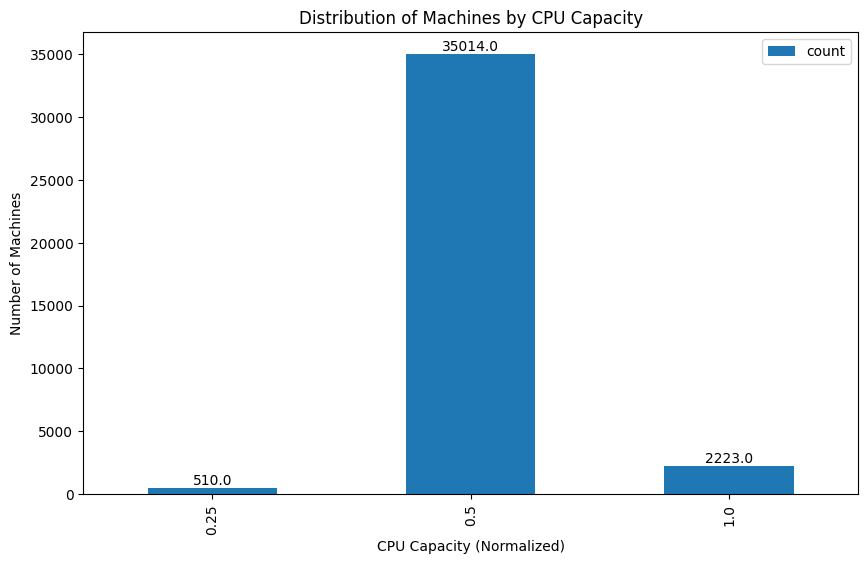

In [23]:
# Visualization
cpu_distribution_pd = cpu_distribution.toPandas()

import matplotlib.pyplot as plt

cpu_distribution_pd.plot(kind="bar", x="cpu_capacity", y="count", figsize=(10, 6))
plt.title("Distribution of Machines by CPU Capacity")
plt.xlabel("CPU Capacity (Normalized)")
plt.ylabel("Number of Machines")
for index, value in cpu_distribution_pd.iterrows():
    plt.text(index, value["count"], str(value["count"]), ha="center", va="bottom")

plt.show()

##Extension

## Compare Spark with Pandas
In this section we take a subset of the data (e.g., first 10,000 rows) and perform the same analysis using Pandas. Then we measure runtime and memory usage for Spark and Pandas. What we notice is that:


*   Pandas: Easier for small datasets but slower and memory-intensive for large ones.
*  Spark: Handles large-scale data efficiently due to distributed computation.

In [ ]:
# Convert Spark DataFrame to Pandas
pandas_df = df.limit(10000).toPandas()

# Group by CPU capacity in Pandas
pandas_grouped = pandas_df.groupby("cpu_capacity")["machine_id"].count()
print(pandas_grouped)

cpu_capacity
0.25      37
0.50    9963
Name: machine_id, dtype: int64


In [ ]:
import time

# Measure runtime in Pandas
start_time = time.time()
pandas_grouped = pandas_df.groupby("cpu_capacity")["machine_id"].count()
print(f"Pandas runtime: {time.time() - start_time:.2f} seconds")

# Use a subset of 10,000 rows for Spark
spark_subset = df.limit(10000)

# Measure runtime in Spark with the subset
start_time = time.time()
spark_grouped = spark_subset.groupBy("cpu_capacity").count().collect()
print(f"Spark runtime on subset: {time.time() - start_time:.2f} seconds")



Pandas runtime: 0.00 seconds
Spark runtime on subset: 0.49 seconds


***Question 2:***

What is the percentage of computational power lost due to maintenance (a machine went
offline and reconnected later)?

In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Filter rows to exclude removed machines (event_type = 1)
valid_machines = df.filter((col("event_type") == 0) | (col("event_type") == 2))

# Calculate total CPU capacity (excluding removed machines)
total_cpu_capacity = valid_machines.agg(spark_sum("cpu_capacity").alias("total_cpu")).collect()[0]["total_cpu"]

# Filter rows where machines went offline (event_type indicates "offline")
offline_machines = df.filter(col("event_type") == 2)

# Sum CPU capacity of offline machines
offline_cpu_capacity = offline_machines.agg(spark_sum("cpu_capacity").alias("offline_cpu")).collect()[0]["offline_cpu"]

# Calculate the percentage of computational power lost
percentage_lost = (offline_cpu_capacity / total_cpu_capacity) * 100
print(f"Percentage of computational power lost due to maintenance: {percentage_lost:.2f}%")


Percentage of computational power lost due to maintenance: 24.76%


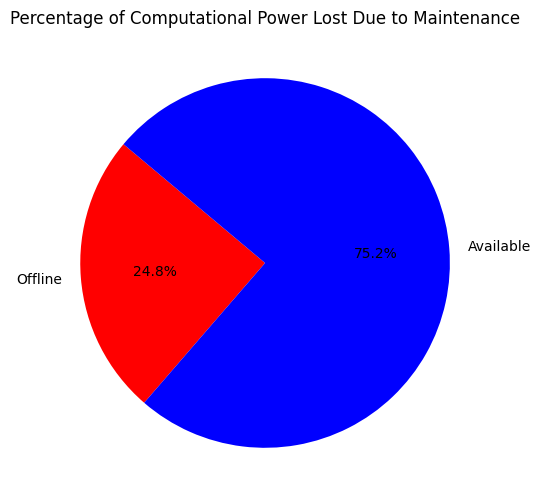

In [ ]:
# Plot the result
import matplotlib.pyplot as plt

data = {"Offline": offline_cpu_capacity, "Available": total_cpu_capacity - offline_cpu_capacity}
labels = data.keys()
sizes = data.values()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
plt.title("Percentage of Computational Power Lost Due to Maintenance")
plt.show()

**Question 3:**

What is the distribution of the number of jobs/tasks per scheduling class?

For Jobs:

In [ ]:
!gsutil cp gs://clusterdata-2011-2/job_events/part-00049-of-00500.csv.gz ./
!gunzip part-00049-of-00500.csv.gz

Copying gs://clusterdata-2011-2/job_events/part-00049-of-00500.csv.gz...
/ [1 files][217.2 KiB/217.2 KiB]                                                
Operation completed over 1 objects/217.2 KiB.                                    


In [ ]:
# Load the job_events dataset
df_jobs = spark.read.csv("part-00049-of-00500.csv", header=False, inferSchema=True)

In [ ]:
# # Assign proper column names based on schema
job_columns = [
    "time", "missing_info", "job_id", "event_type", "user",
    "scheduling_class", "job_name", "logical_job_name"
]
df_jobs = df_jobs.toDF(*job_columns)

df_jobs.printSchema()
print(" Job Event Table:")
df_jobs.show(5)

root
 |-- time: long (nullable = true)
 |-- missing_info: string (nullable = true)
 |-- job_id: long (nullable = true)
 |-- event_type: integer (nullable = true)
 |-- user: string (nullable = true)
 |-- scheduling_class: integer (nullable = true)
 |-- job_name: string (nullable = true)
 |-- logical_job_name: string (nullable = true)

 Job Event Table:
+------------+------------+----------+----------+--------------------+----------------+--------------------+--------------------+
|        time|missing_info|    job_id|event_type|                user|scheduling_class|            job_name|    logical_job_name|
+------------+------------+----------+----------+--------------------+----------------+--------------------+--------------------+
|246152710194|        null|6280409742|         0|P/b25hVu6/7A0BJOL...|               1|aHSQqsS74DpHUfJe4...|om16WKN2OBzTA8mmO...|
|246152712720|        null|6280409766|         0|P/b25hVu6/7A0BJOL...|               1|XwsaVZfkO3IeWhJxE...|/vNf9QQHQoFmSXBio.

In [ ]:
from pyspark.sql.functions import col

df_jobs = df_jobs.filter(df_jobs["scheduling_class"].isNotNull())

# Group data by scheduling_class and count jobs/tasks
scheduling_class_distribution = df_jobs.groupBy("scheduling_class").count().orderBy("scheduling_class")

# Show the results
scheduling_class_distribution.show()

# Convert to Pandas for visualization
scheduling_class_distribution_pd = scheduling_class_distribution.toPandas()


+----------------+-----+
|scheduling_class|count|
+----------------+-----+
|               0| 1844|
|               1| 1733|
|               2| 1481|
|               3|   31|
+----------------+-----+



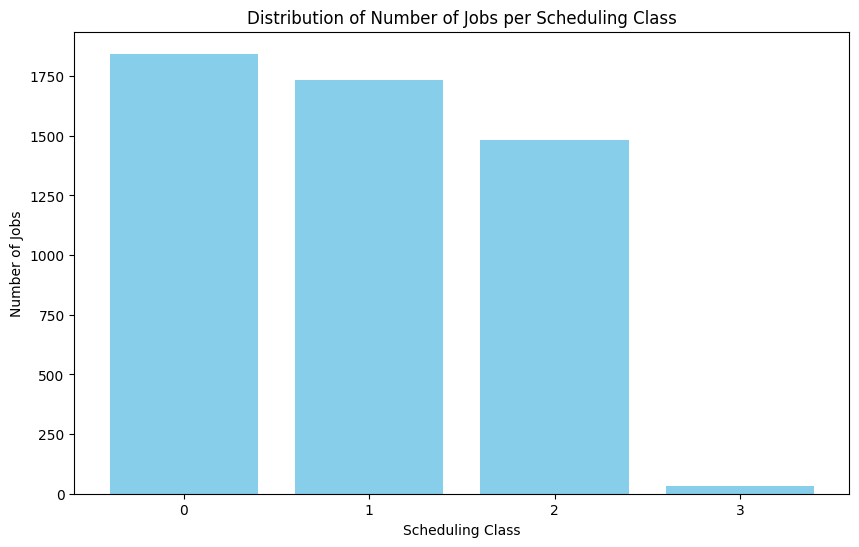

In [ ]:
# Ensure scheduling_class is numeric
scheduling_class_distribution_pd["scheduling_class"] = scheduling_class_distribution_pd["scheduling_class"].astype(int)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(
    scheduling_class_distribution_pd["scheduling_class"],
    scheduling_class_distribution_pd["count"],
    color="skyblue"
)
plt.title("Distribution of Number of Jobs per Scheduling Class")
plt.xlabel("Scheduling Class")
plt.ylabel("Number of Jobs")
plt.xticks(scheduling_class_distribution_pd["scheduling_class"])
plt.show()


Since part-00001-of00001.csv did not contain all columns of task_events, we chose a different part to reach the scheduling_class column in task_events

In [ ]:
!gsutil cp gs://clusterdata-2011-2/task_events/part-00050-of-00500.csv.gz ./
!gunzip part-00050-of-00500.csv.gz

# Load the file
df_tasks = spark.read.csv("part-00050-of-00500.csv", header=False, inferSchema=True)
df_tasks.printSchema()

Copying gs://clusterdata-2011-2/task_events/part-00050-of-00500.csv.gz...
/ [1 files][  5.5 MiB/  5.5 MiB]                                                
Operation completed over 1 objects/5.5 MiB.                                      
gzip: part-00050-of-00500.csv already exists; do you wish to overwrite (y or n)? ^C
root
 |-- _c0: long (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: long (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: long (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: integer (nullable = true)
 |-- _c8: integer (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: double (nullable = true)
 |-- _c12: integer (nullable = true)



In [ ]:
task_columns = [
    "time", "missing_info", "job_id", "task_index", "machine_id", "event_type",
    "user", "scheduling_class", "priority", "cpu_request", "memory_request",
    "disk_request", "different_machine_restriction"
]

df_tasks = df_tasks.toDF(*task_columns)
df_tasks.printSchema()


root
 |-- time: long (nullable = true)
 |-- missing_info: string (nullable = true)
 |-- job_id: long (nullable = true)
 |-- task_index: integer (nullable = true)
 |-- machine_id: long (nullable = true)
 |-- event_type: integer (nullable = true)
 |-- user: string (nullable = true)
 |-- scheduling_class: integer (nullable = true)
 |-- priority: integer (nullable = true)
 |-- cpu_request: double (nullable = true)
 |-- memory_request: double (nullable = true)
 |-- disk_request: double (nullable = true)
 |-- different_machine_restriction: integer (nullable = true)



In [ ]:
scheduling_class_distribution = df_tasks.groupBy("scheduling_class").count().orderBy("scheduling_class")
scheduling_class_distribution.show()

+----------------+------+
|scheduling_class| count|
+----------------+------+
|               0|185504|
|               1|274403|
|               2| 21221|
|               3|  4757|
+----------------+------+



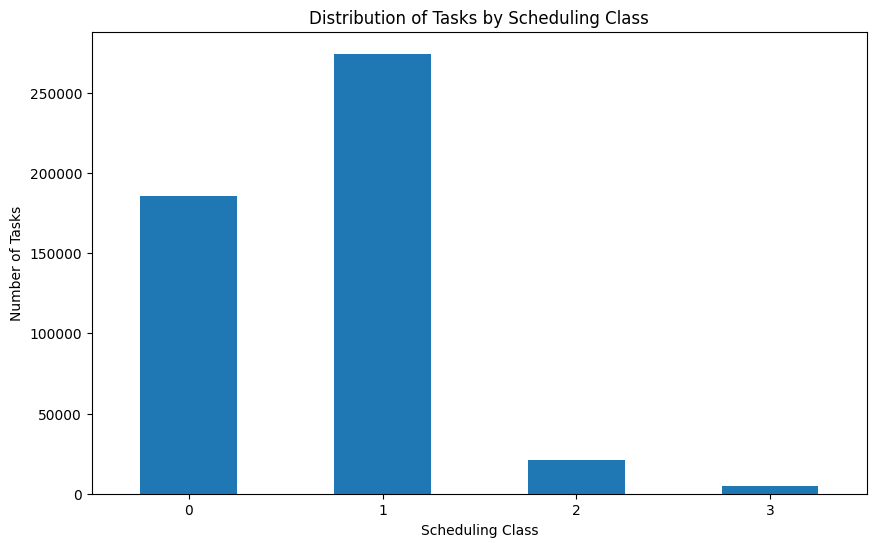

In [ ]:
import matplotlib.pyplot as plt

# Convert to Pandas
scheduling_class_pd = scheduling_class_distribution.toPandas()

# Plot
scheduling_class_pd.plot(
    kind="bar", x="scheduling_class", y="count", legend=False, figsize=(10, 6)
)
plt.title("Distribution of Tasks by Scheduling Class")
plt.xlabel("Scheduling Class")
plt.ylabel("Number of Tasks")
plt.xticks(rotation=0)
plt.show()



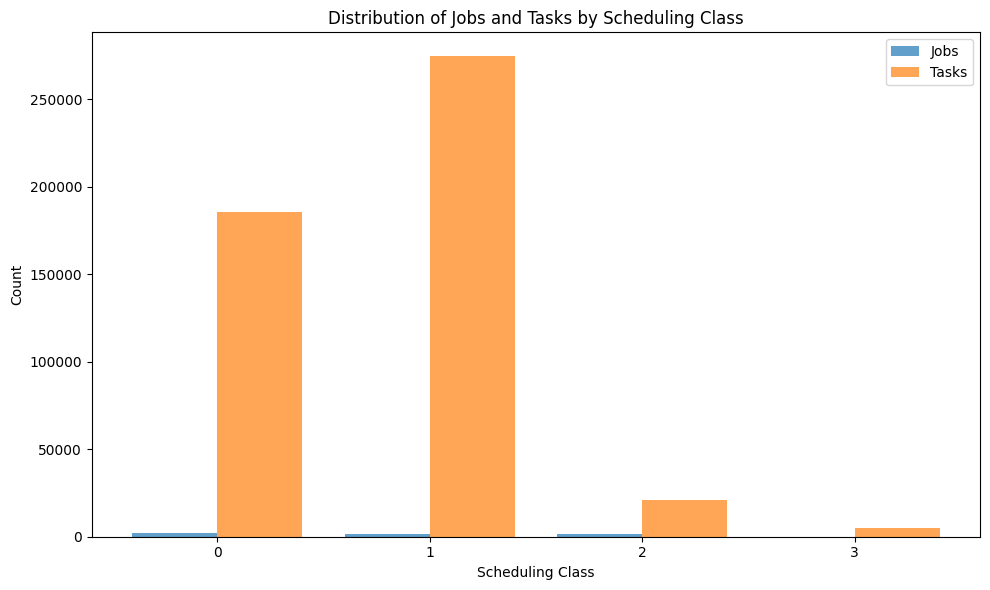

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert both distributions to Pandas DataFrames
jobs_pd = scheduling_class_distribution_pd  # From jobs
tasks_pd = scheduling_class_pd  # From tasks

# Align data for scheduling classes present in both distributions
combined_df = jobs_pd.merge(
    tasks_pd, on="scheduling_class", suffixes=("_jobs", "_tasks")
)

# Extract data
x = combined_df["scheduling_class"]
jobs = combined_df["count_jobs"]
tasks = combined_df["count_tasks"]

# Define positions for grouped bars
x_pos = np.arange(len(x))
width = 0.4

# Plot grouped bars
plt.figure(figsize=(10, 6))
plt.bar(x_pos - width/2, jobs, width, label="Jobs", alpha=0.7)
plt.bar(x_pos + width/2, tasks, width, label="Tasks", alpha=0.7)

# Add labels, legend, and title
plt.xlabel("Scheduling Class")
plt.ylabel("Count")
plt.title("Distribution of Jobs and Tasks by Scheduling Class")
plt.xticks(x_pos, x)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Question 4**

Do tasks with a low scheduling class have a higher probability of being evicted?

In [ ]:
# Evicted tasks are event type 2, so we filter them first
evicted_tasks = df_tasks.filter(df_tasks["event_type"] == 2)

In [ ]:
total_tasks = df_tasks.groupBy("scheduling_class").count().withColumnRenamed("count", "total_count")
total_tasks.show()

+----------------+-----------+
|scheduling_class|total_count|
+----------------+-----------+
|               1|     274403|
|               3|       4757|
|               2|      21221|
|               0|     185504|
+----------------+-----------+



In [ ]:
evicted_count = evicted_tasks.groupBy("scheduling_class").count().withColumnRenamed("count", "evicted_count")
evicted_count.show()

+----------------+-------------+
|scheduling_class|evicted_count|
+----------------+-------------+
|               1|         5814|
|               3|          132|
|               2|         1255|
|               0|        12259|
+----------------+-------------+



In [ ]:
from pyspark.sql.functions import col

# Join total tasks and evicted tasks
eviction_rate_df = total_tasks.join(evicted_count, "scheduling_class", "left_outer")

# Calculate eviction rate
eviction_rate_df = eviction_rate_df.withColumn(
    "eviction_rate", col("evicted_count") / col("total_count")
)
eviction_rate_df.show()

+----------------+-----------+-------------+--------------------+
|scheduling_class|total_count|evicted_count|       eviction_rate|
+----------------+-----------+-------------+--------------------+
|               1|     274403|         5814|0.021187815002022572|
|               3|       4757|          132|0.027748581038469625|
|               2|      21221|         1255| 0.05913953159606051|
|               0|     185504|        12259| 0.06608482835949629|
+----------------+-----------+-------------+--------------------+



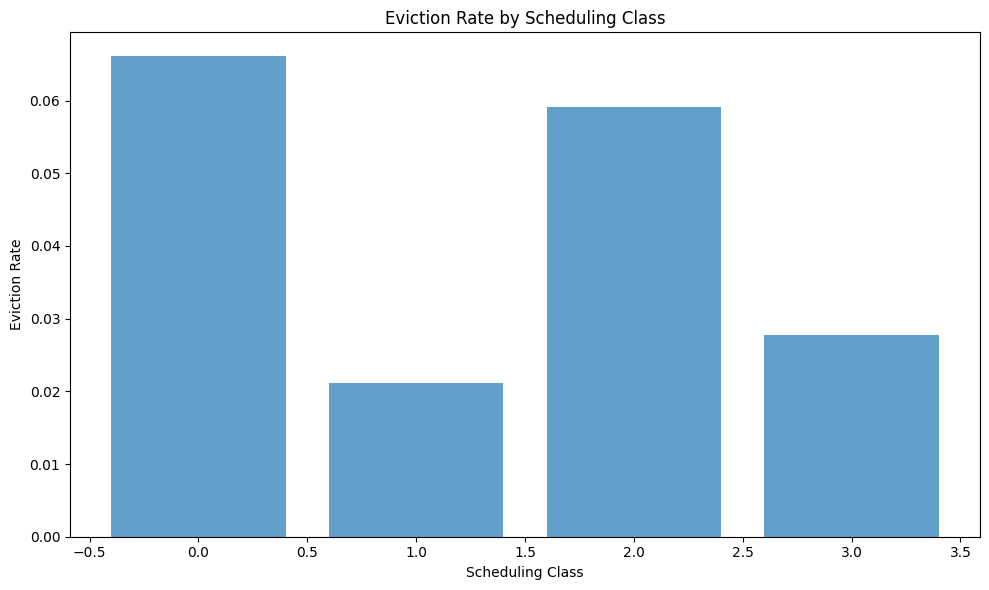

In [ ]:
import matplotlib.pyplot as plt

# Convert to Pandas
eviction_rate_pd = eviction_rate_df.toPandas()

# Plot eviction rates
plt.figure(figsize=(10, 6))
plt.bar(eviction_rate_pd["scheduling_class"], eviction_rate_pd["eviction_rate"], alpha=0.7)
plt.title("Eviction Rate by Scheduling Class")
plt.xlabel("Scheduling Class")
plt.ylabel("Eviction Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


***Question 5***  

In general, do tasks from the same job run on the same machine?

In [ ]:
from pyspark.sql.functions import collect_set

job_task_distribution = df_tasks.groupBy("job_id").agg(
    collect_set("machine_id").alias("unique_machine_ids")
)

# Add a column to count the number of unique machines per job
from pyspark.sql.functions import size
job_task_distribution = job_task_distribution.withColumn(
    "unique_machines", size("unique_machine_ids")
)
job_task_distribution.show()


+----------+--------------------+---------------+
|    job_id|  unique_machine_ids|unique_machines|
+----------+--------------------+---------------+
|5554591681|[5140209174, 3866...|              2|
|6280842804|[294924601, 29477...|             50|
|6280943335|        [3584048977]|              1|
|6280964430|[294863042, 16943...|             50|
|6280965129|         [617369746]|              1|
|6280647349|           [1697534]|              1|
|6281181370|           [1094594]|              1|
|6281199811|        [1436313838]|              1|
|6281213429|[368691893, 43026...|            928|
|6281227842|            [982412]|              1|
|5129801730|          [16918689]|              1|
|6271029164|[1694600, 2287075...|             43|
|6280823262|           [8055060]|              1|
|6280896595|        [4469327972]|              1|
|6280913680|[336061640, 14413...|              4|
|6280954473|        [2898888776]|              1|
|5633011295|[4820097048, 4820...|              2|


In [ ]:
single_machine_jobs = job_task_distribution.filter(job_task_distribution["unique_machines"] == 1).count()
total_jobs = job_task_distribution.count()

# Calculate percentage of jobs with tasks on a single machine
single_machine_percentage = (single_machine_jobs / total_jobs) * 100
print(f"Percentage of jobs with all tasks on a single machine: {single_machine_percentage:.2f}%")

Percentage of jobs with all tasks on a single machine: 59.81%


In [ ]:
job_task_pd = job_task_distribution.toPandas()
job_task_pd["unique_machines"].describe()

,unique_machines
count,2207.000000
mean,39.022655
std,294.165768
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,7524.000000


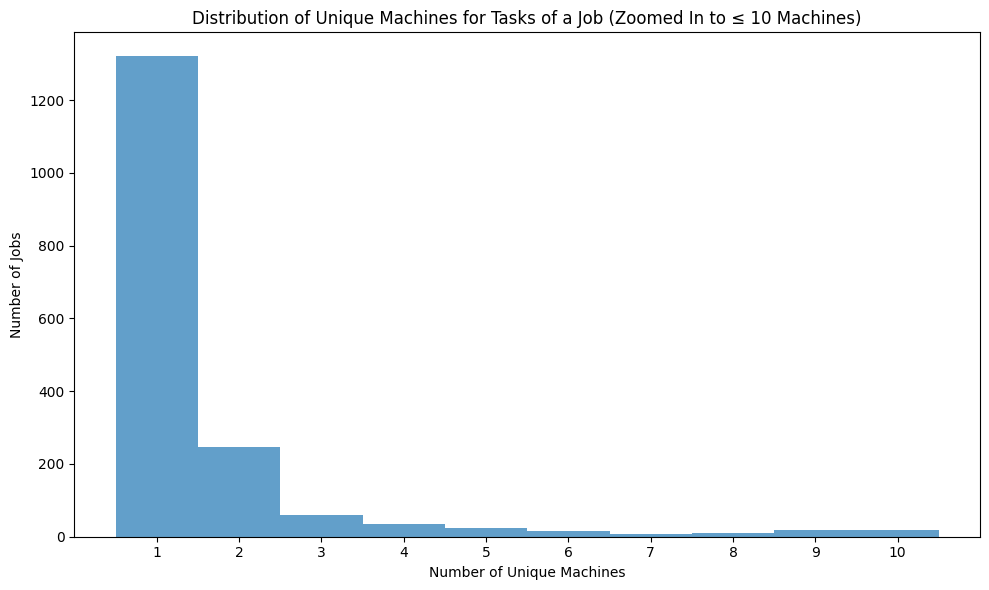

In [ ]:
filtered_data = job_task_pd[job_task_pd["unique_machines"] <= 10]

plt.figure(figsize=(10, 6))
plt.hist(
    filtered_data["unique_machines"],
    bins=range(1, 12),  # Bins for 1 to 10 machines
    align="left",
    alpha=0.7
)
plt.title("Distribution of Unique Machines for Tasks of a Job (Zoomed In to ≤ 10 Machines)")
plt.xlabel("Number of Unique Machines")
plt.ylabel("Number of Jobs")
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()



Majority of Jobs Run on 1 Machine:

- 59.81% of jobs have all their tasks running on a single machine.
- This indicates that most jobs are lightweight and colocated, likely due to low resource requirements or high latency sensitivity.

Significant Proportion Run on Multiple Machines:
- 39.42% of jobs require tasks to run across multiple machines.
- These jobs might be resource-intensive (e.g., requiring more CPU or memory) or inherently parallel (e.g., batch processing or distributed computations).

In [ ]:
# Count jobs running on exactly 1 machine
jobs_on_one_machine = job_task_pd[job_task_pd["unique_machines"] == 1].shape[0]

# Count jobs running on more than 1 machine
jobs_on_multiple_machines = job_task_pd[job_task_pd["unique_machines"] > 1].shape[0]

# Total jobs
total_jobs = job_task_pd.shape[0]

# Calculate percentages
percentage_one_machine = (jobs_on_one_machine / total_jobs) * 100
percentage_multiple_machines = (jobs_on_multiple_machines / total_jobs) * 100

# Print the statistics
print(f"Jobs running on 1 machine: {jobs_on_one_machine} ({percentage_one_machine:.2f}%)")
print(f"Jobs running on more than 1 machine: {jobs_on_multiple_machines} ({percentage_multiple_machines:.2f}%)")


Jobs running on 1 machine: 1320 (59.81%)
Jobs running on more than 1 machine: 870 (39.42%)


**Question 6:**

 Are the tasks that request more resources the ones that consume more resources?

In [ ]:
!gsutil ls gs://clusterdata-2011-2/

gs://clusterdata-2011-2/MD5SUM
gs://clusterdata-2011-2/README
gs://clusterdata-2011-2/SHA1SUM
gs://clusterdata-2011-2/SHA256SUM
gs://clusterdata-2011-2/schema.csv
gs://clusterdata-2011-2/job_events/
gs://clusterdata-2011-2/machine_attributes/
gs://clusterdata-2011-2/machine_events/
gs://clusterdata-2011-2/task_constraints/
gs://clusterdata-2011-2/task_events/
gs://clusterdata-2011-2/task_usage/


In [ ]:
!gsutil ls gs://clusterdata-2011-2/task_usage/


gs://clusterdata-2011-2/task_usage/part-00000-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00001-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00002-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00003-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00004-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00005-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00006-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00007-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00008-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00009-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00010-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00011-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00012-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00013-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00014-of-00500.csv.gz
gs://clusterdata-2011-2/task_usage/part-00015-of-00500.csv.gz
gs://clu

In [ ]:
!gsutil cp gs://clusterdata-2011-2/task_usage/part-00000-of-00500.csv.gz ./
!gunzip part-00000-of-00500.csv.gz

# Load into a Spark DataFrame
df_task_usage = spark.read.csv("part-00000-of-00500.csv", header=False, inferSchema=True)
df_task_usage.printSchema()
df_task_usage.show(5)

Copying gs://clusterdata-2011-2/task_usage/part-00000-of-00500.csv.gz...
\ [1 files][ 87.5 MiB/ 87.5 MiB]                                                
Operation completed over 1 objects/87.5 MiB.                                     
root
 |-- _c0: long (nullable = true)
 |-- _c1: long (nullable = true)
 |-- _c2: long (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: long (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: double (nullable = true)
 |-- _c12: double (nullable = true)
 |-- _c13: double (nullable = true)
 |-- _c14: double (nullable = true)
 |-- _c15: double (nullable = true)
 |-- _c16: double (nullable = true)
 |-- _c17: integer (nullable = true)
 |-- _c18: integer (nullable = true)
 |-- _c19: double (nullable = true)

+---------+---------+-------+---+----------+--------+

In [ ]:
# Define the columns for the task_usage data based on the schema provided
task_usage_columns = [
    "start_time", "end_time", "job_id", "task_index", "machine_id",
    "cpu_rate", "canonical_memory_usage", "assigned_memory_usage",
    "unmapped_page_cache", "total_page_cache", "maximum_memory_usage",
    "disk_io_time", "local_disk_space_usage", "maximum_cpu_rate",
    "maximum_disk_io_time", "cycles_per_instruction",
    "memory_accesses_per_instruction", "sample_portion",
    "aggregation_type", "sampled_cpu_usage"
]

# Rename the columns to match the schema
df_task_usage = df_task_usage.toDF(*task_usage_columns)

# Display the schema and a sample of the dataset to verify
df_task_usage.printSchema()
df_task_usage.show(5)

root
 |-- start_time: long (nullable = true)
 |-- end_time: long (nullable = true)
 |-- job_id: long (nullable = true)
 |-- task_index: integer (nullable = true)
 |-- machine_id: long (nullable = true)
 |-- cpu_rate: double (nullable = true)
 |-- canonical_memory_usage: double (nullable = true)
 |-- assigned_memory_usage: double (nullable = true)
 |-- unmapped_page_cache: double (nullable = true)
 |-- total_page_cache: double (nullable = true)
 |-- maximum_memory_usage: double (nullable = true)
 |-- disk_io_time: double (nullable = true)
 |-- local_disk_space_usage: double (nullable = true)
 |-- maximum_cpu_rate: double (nullable = true)
 |-- maximum_disk_io_time: double (nullable = true)
 |-- cycles_per_instruction: double (nullable = true)
 |-- memory_accesses_per_instruction: double (nullable = true)
 |-- sample_portion: integer (nullable = true)
 |-- aggregation_type: integer (nullable = true)
 |-- sampled_cpu_usage: double (nullable = true)

+----------+---------+-------+---------

In [ ]:
# Example: Performing further analysis
# Calculate the average CPU and memory usage for each job
from pyspark.sql.functions import avg

avg_usage_per_job = df_task_usage.groupBy("job_id").agg(
    avg("cpu_rate").alias("avg_cpu_rate"),
    avg("canonical_memory_usage").alias("avg_memory_usage")
)

# Show the average usage per job
avg_usage_per_job.show(5)

+----------+--------------------+--------------------+
|    job_id|        avg_cpu_rate|    avg_memory_usage|
+----------+--------------------+--------------------+
|2509801309|0.004876411764705882|0.003249725490196...|
|4537082914|0.002769217647058824|0.002645882352941176|
|4645263861|2.642294117647059E-5|1.355058823529411...|
|4974913023|4.526588235294117E-4|0.001903764705882353|
|5440065284|0.009467385130718955|0.048431910130718944|
+----------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col, avg

# Join the two DataFrames on job_id and task_index
tasks_combined = df_tasks.join(df_task_usage, ["job_id", "task_index"])

# Calculate the ratios of consumed/requested resources
tasks_combined = tasks_combined.withColumn(
    "cpu_ratio", col("cpu_rate") / col("cpu_request")
).withColumn(
    "memory_ratio", col("canonical_memory_usage") / col("memory_request")
)

# Show the resulting DataFrame with ratios
tasks_combined.select(
    "job_id", "task_index", "cpu_request", "cpu_rate", "cpu_ratio",
    "memory_request", "canonical_memory_usage", "memory_ratio"
).show(5)

+----------+----------+-----------+--------+-------------------+--------------+----------------------+-------------------+
|    job_id|task_index|cpu_request|cpu_rate|          cpu_ratio|memory_request|canonical_memory_usage|       memory_ratio|
+----------+----------+-----------+--------+-------------------+--------------+----------------------+-------------------+
|5402488769|      1435|   6.247E-4|4.578E-5|0.07328317592444374|      0.003883|              9.279E-4|0.23896471800154517|
|5402488769|      1435|   6.247E-4|4.482E-5|0.07174643829037938|      0.003883|              9.298E-4|0.23945403038887458|
|5402488769|      1435|   6.247E-4|4.482E-5|0.07174643829037938|      0.003883|              9.279E-4|0.23896471800154517|
|5402488769|      1435|   6.247E-4|4.482E-5|0.07174643829037938|      0.003883|              9.298E-4|0.23945403038887458|
|5402488769|      1435|   6.247E-4|4.578E-5|0.07328317592444374|      0.003883|              9.279E-4|0.23896471800154517|
+----------+----

In [ ]:
# Aggregate to find the average ratios
average_ratios = tasks_combined.groupBy().agg(
    avg("cpu_ratio").alias("avg_cpu_ratio"),
    avg("memory_ratio").alias("avg_memory_ratio")
)

# Show the average ratios
average_ratios.show()

+------------------+-----------------+
|     avg_cpu_ratio| avg_memory_ratio|
+------------------+-----------------+
|0.1511406017765278|0.191974804371141|
+------------------+-----------------+



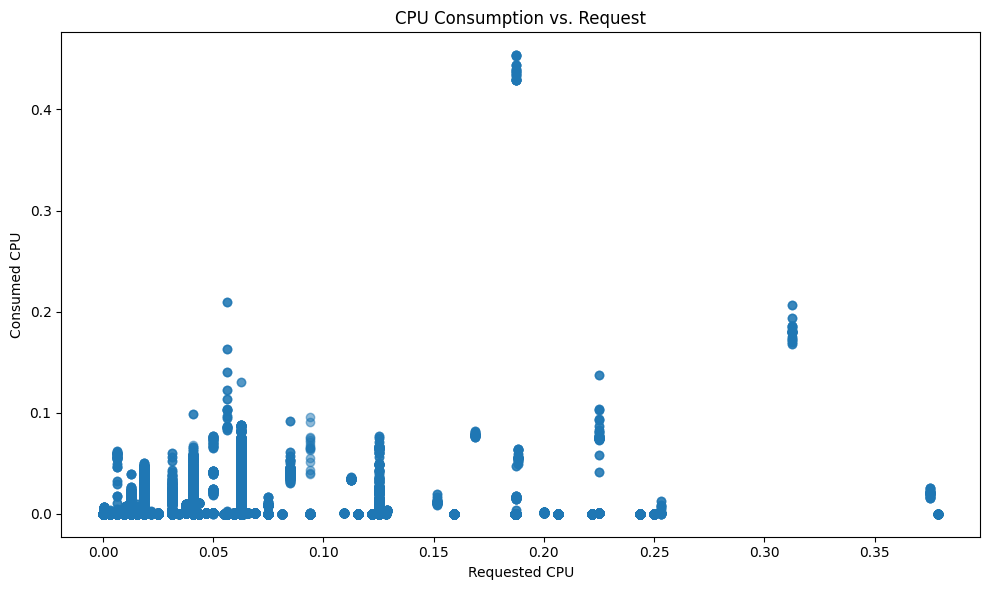

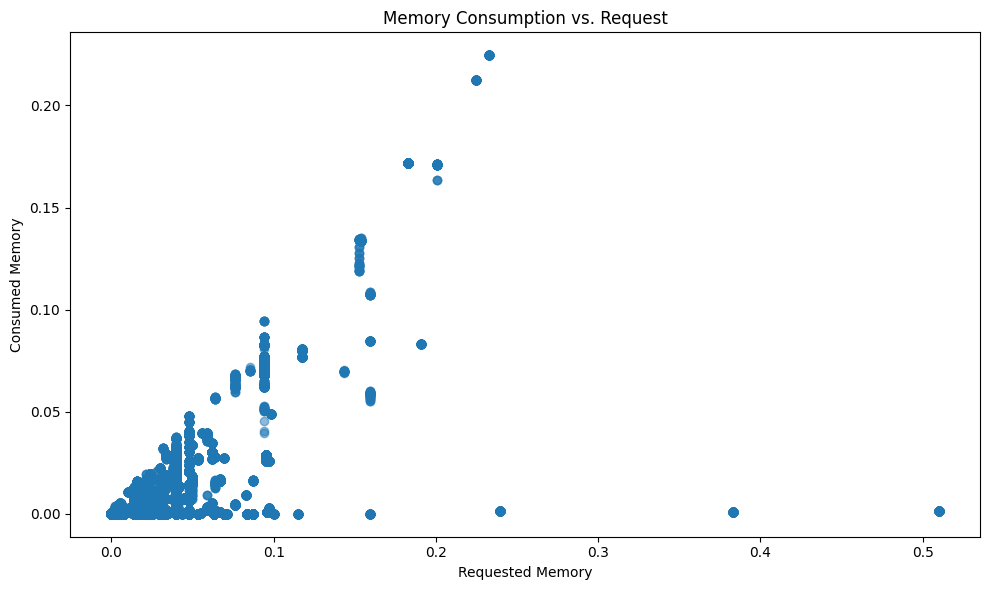

In [ ]:
import matplotlib.pyplot as plt

# Convert to Pandas for visualization
tasks_combined_pd = tasks_combined.select(
    "cpu_request", "cpu_rate", "memory_request", "canonical_memory_usage"
).toPandas()

# Scatter plot for CPU
plt.figure(figsize=(10, 6))
plt.scatter(tasks_combined_pd["cpu_request"], tasks_combined_pd["cpu_rate"], alpha=0.5)
plt.title("CPU Consumption vs. Request")
plt.xlabel("Requested CPU")
plt.ylabel("Consumed CPU")
plt.tight_layout()
plt.show()

# Scatter plot for Memory
plt.figure(figsize=(10, 6))
plt.scatter(tasks_combined_pd["memory_request"], tasks_combined_pd["canonical_memory_usage"], alpha=0.5)
plt.title("Memory Consumption vs. Request")
plt.xlabel("Requested Memory")
plt.ylabel("Consumed Memory")
plt.tight_layout()
plt.show()


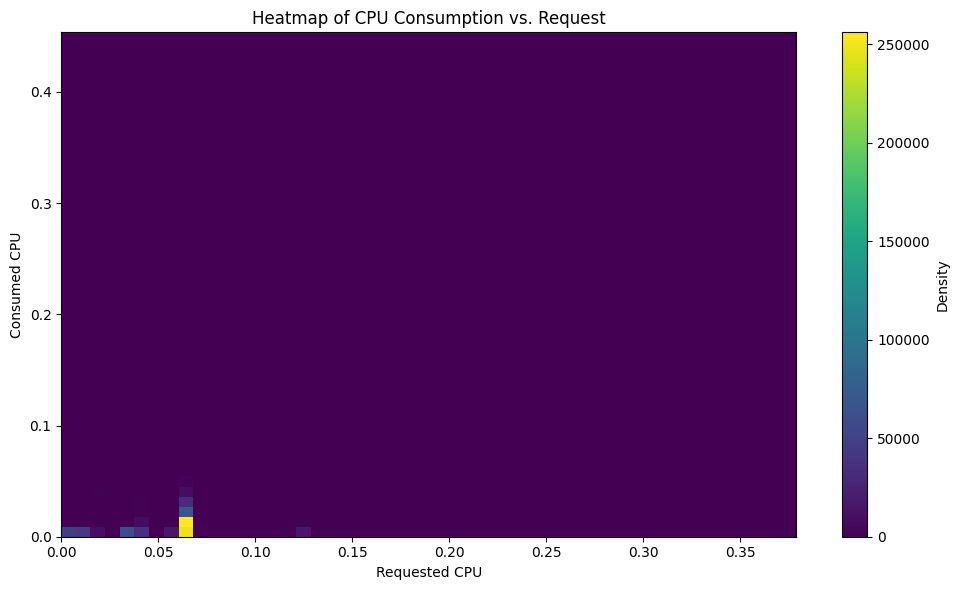

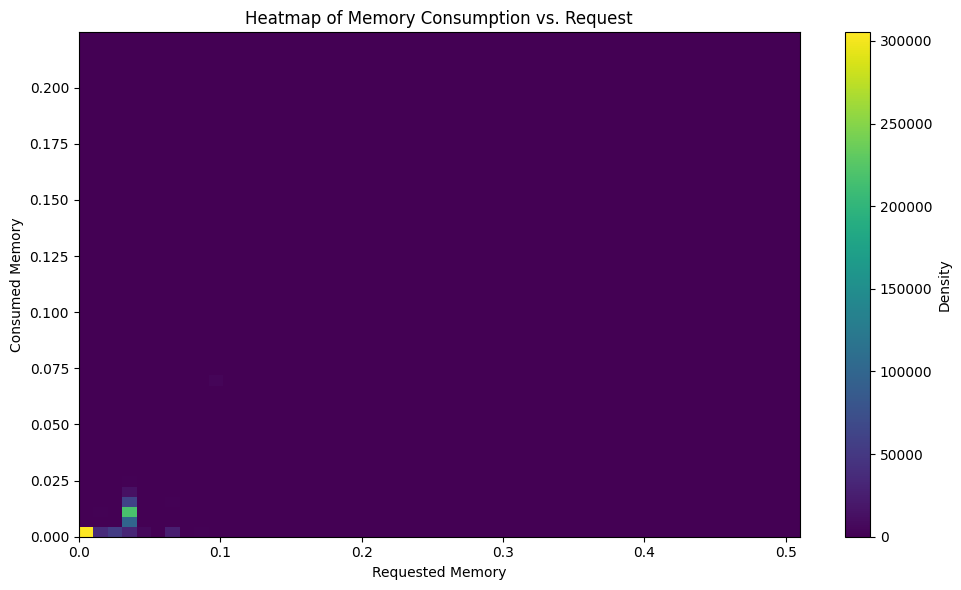

In [ ]:
import numpy as np

# Heatmap for CPU
cpu_heatmap, xedges, yedges = np.histogram2d(
    tasks_combined_pd["cpu_request"], tasks_combined_pd["cpu_rate"], bins=50
)

plt.figure(figsize=(10, 6))
plt.imshow(cpu_heatmap.T, origin="lower", aspect="auto", extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.title("Heatmap of CPU Consumption vs. Request")
plt.xlabel("Requested CPU")
plt.ylabel("Consumed CPU")
plt.colorbar(label="Density")
plt.tight_layout()
plt.show()

# Heatmap for Memory
memory_heatmap, xedges, yedges = np.histogram2d(
    tasks_combined_pd["memory_request"], tasks_combined_pd["canonical_memory_usage"], bins=50
)

plt.figure(figsize=(10, 6))
plt.imshow(memory_heatmap.T, origin="lower", aspect="auto", extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.title("Heatmap of Memory Consumption vs. Request")
plt.xlabel("Requested Memory")
plt.ylabel("Consumed Memory")
plt.colorbar(label="Density")
plt.tight_layout()
plt.show()


**Question 7:**

Can we observe correlations between peaks of high resource consumption on some ma-
chines and task eviction events?

In [ ]:
from pyspark.sql.functions import col, when, avg, max, pandas_udf
from pyspark.sql.types import DoubleType
import numpy as np  # Ensure numpy is also imported for percentile calculation
import pandas as pd  # Ensure pandas is also imported

# Step 1: Define a UDF to calculate percentiles
@pandas_udf(DoubleType())
def percentile_approx_udf(values: pd.Series) -> float:
    return np.percentile(values, 90)  # Hardcoding the 90th percentile

# Step 2: Group by machine_id and calculate the 90th percentile for each resource
thresholds = df_tasks.groupBy("machine_id").agg(
    percentile_approx_udf(col("cpu_request")).alias("cpu_threshold"),
    percentile_approx_udf(col("memory_request")).alias("memory_threshold"),
    percentile_approx_udf(col("disk_request")).alias("disk_threshold")
)

thresholds.show()


+----------+--------------------+--------------------+--------------------+
|machine_id|       cpu_threshold|    memory_threshold|      disk_threshold|
+----------+--------------------+--------------------+--------------------+
|        26|             0.03125|0.047510000000000004|            0.001131|
|    381364|             0.06873|             0.07959|            1.154E-4|
|    418690|             0.06873|             0.07959|            7.725E-5|
|    672517| 0.07500000000000001|            0.042964|           3.2444E-4|
|    903236|             0.06873|             0.07959|            5.817E-5|
|   1093605|             0.06873|             0.07959|            1.507E-4|
|   1268612|                 0.0|            9.537E-7|                 0.0|
|   1271879|             0.06873|            0.034197|            0.001543|
|   1272595|             0.06873|             0.07959|            5.398E-4|
|   1273026|              0.0625|             0.04663|2.496399999999998...|
|   1273307|

In [ ]:
# Step 3: Identify tasks with resource peaks
tasks_with_peaks = df_tasks.join(thresholds, "machine_id").filter(
    (col("cpu_request") > col("cpu_threshold")) |
    (col("memory_request") > col("memory_threshold")) |
    (col("disk_request") > col("disk_threshold"))
)

# Add a flag for resource peaks
tasks_with_peaks = tasks_with_peaks.withColumn("resource_peak", when(
    (col("cpu_request") > col("cpu_threshold")) |
    (col("memory_request") > col("memory_threshold")) |
    (col("disk_request") > col("disk_threshold")), 1).otherwise(0)
)
tasks_with_peaks.show()

+----------+------------+------------+----------+----------+----------+--------------------+----------------+--------+-----------+--------------+------------+-----------------------------+-------------+--------------------+--------------+-------------+
|machine_id|        time|missing_info|    job_id|task_index|event_type|                user|scheduling_class|priority|cpu_request|memory_request|disk_request|different_machine_restriction|cpu_threshold|    memory_threshold|disk_threshold|resource_peak|
+----------+------------+------------+----------+----------+----------+--------------------+----------------+--------+-----------+--------------+------------+-----------------------------+-------------+--------------------+--------------+-------------+
|        26|253482736610|        null|6281060560|         5|         1|5O7KchgAlEtI+Xw9m...|               0|       0|    0.01562|       0.04773|    1.154E-4|                            0|      0.03125|0.047510000000000004|      0.001131|   

In [ ]:
# Step 4: Identify eviction events
evicted_tasks = df_tasks.filter(df_tasks["event_type"] == 2).select("job_id", "machine_id", "time")

In [ ]:
# Step 5: Join eviction events with tasks having resource peaks
eviction_with_peaks = evicted_tasks.join(tasks_with_peaks, ["machine_id", "job_id"])

# Calculate correlation between peaks and eviction events
correlation = eviction_with_peaks.count() / evicted_tasks.count()
print(f"Correlation between resource peaks and eviction events: {correlation:.2f}")

Correlation between resource peaks and eviction events: 0.25


<ipython-input-69-51c3a9cec444>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = eviction_peak_pd.groupby("machine_bin")["count"].sum().reset_index()


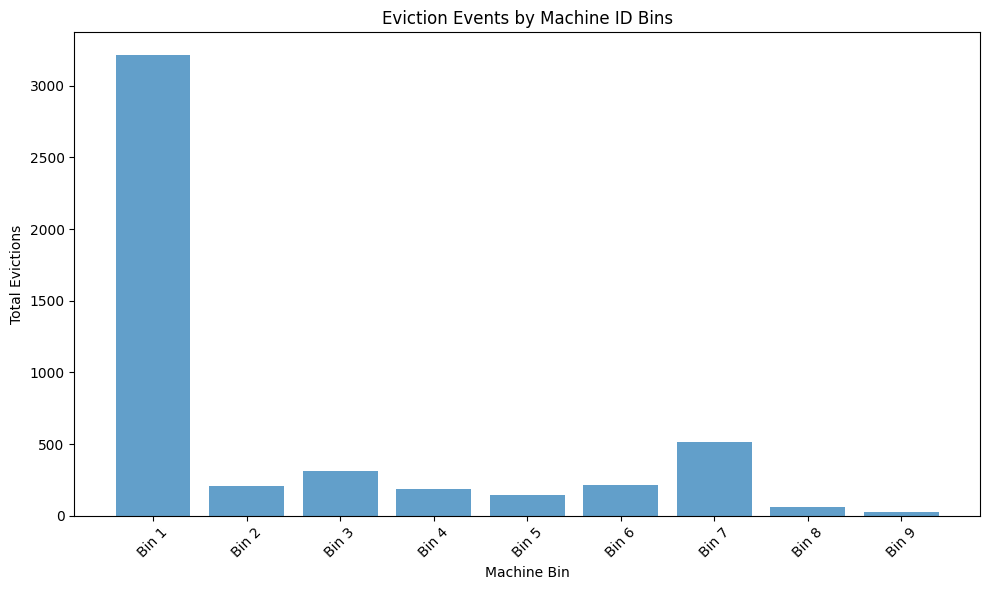

In [ ]:
import numpy as np

eviction_peak_pd["count"] = 1  # Assign 1 to each row to count occurrences

# Bin machine IDs into ranges
eviction_peak_pd["machine_bin"] = pd.cut(
    eviction_peak_pd["machine_id"],
    bins=np.linspace(eviction_peak_pd["machine_id"].min(), eviction_peak_pd["machine_id"].max(), 10),
    labels=[f"Bin {i}" for i in range(1, 10)],
)

# Aggregate counts by bins
binned_data = eviction_peak_pd.groupby("machine_bin")["count"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(binned_data["machine_bin"], binned_data["count"], alpha=0.7)
plt.title("Eviction Events by Machine ID Bins")
plt.xlabel("Machine Bin")
plt.ylabel("Total Evictions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print(eviction_peak_pd.head())
print(eviction_peak_pd.dtypes)

In [ ]:
print(eviction_peak_pd.columns)

Index(['machine_id', 'job_id', 'time', 'time', 'missing_info', 'task_index',
       'event_type', 'user', 'scheduling_class', 'priority', 'cpu_request',
       'memory_request', 'disk_request', 'different_machine_restriction',
       'cpu_threshold', 'memory_threshold', 'disk_threshold', 'resource_peak',
       'machine_bin'],
      dtype='object')


In [ ]:
eviction_peak_pd["machine_bin"].value_counts()

In [ ]:
bin1_machines = eviction_peak_pd[eviction_peak_pd["machine_bin"] == "Bin 1"]
print(bin1_machines)

# Additional Questions

Question 8:

What is the average resource usage (CPU and Memory) per scheduling class?

In [ ]:
# Perform the join on job_id and task_index
df_joined = df_tasks.join(
    df_task_usage,
    (df_tasks["job_id"] == df_task_usage["job_id"]) & (df_tasks["task_index"] == df_task_usage["task_index"]),
    "inner"
)

# Select relevant columns

df_joined = df_tasks.join(
    df_task_usage,
    (df_tasks["job_id"] == df_task_usage["job_id"]) & (df_tasks["task_index"] == df_task_usage["task_index"]),
    "inner"
).select(
    df_tasks["job_id"],
    df_tasks["task_index"],
    df_tasks["scheduling_class"],
    df_tasks["cpu_request"],
    df_tasks["memory_request"],
    df_task_usage["cpu_rate"],
    df_task_usage["canonical_memory_usage"]
)

# Show the first few rows of the joined DataFrame
df_joined.show(5)


+----------+----------+----------------+-----------+--------------+--------+----------------------+
|    job_id|task_index|scheduling_class|cpu_request|memory_request|cpu_rate|canonical_memory_usage|
+----------+----------+----------------+-----------+--------------+--------+----------------------+
|5402488769|      1435|               1|   6.247E-4|      0.003883|4.578E-5|              9.279E-4|
|5402488769|      1435|               1|   6.247E-4|      0.003883|4.482E-5|              9.298E-4|
|5402488769|      1435|               1|   6.247E-4|      0.003883|4.482E-5|              9.279E-4|
|5402488769|      1435|               1|   6.247E-4|      0.003883|4.482E-5|              9.298E-4|
|5402488769|      1435|               1|   6.247E-4|      0.003883|4.578E-5|              9.279E-4|
+----------+----------+----------------+-----------+--------------+--------+----------------------+
only showing top 5 rows



In [ ]:
df_tasks.printSchema()


root
 |-- time: long (nullable = true)
 |-- missing_info: string (nullable = true)
 |-- job_id: long (nullable = true)
 |-- task_index: integer (nullable = true)
 |-- machine_id: long (nullable = true)
 |-- event_type: integer (nullable = true)
 |-- user: string (nullable = true)
 |-- scheduling_class: integer (nullable = true)
 |-- priority: integer (nullable = true)
 |-- cpu_request: double (nullable = true)
 |-- memory_request: double (nullable = true)
 |-- disk_request: double (nullable = true)
 |-- different_machine_restriction: integer (nullable = true)



+----------------+--------------------+--------------------+
|scheduling_class|       avg_cpu_usage|    avg_memory_usage|
+----------------+--------------------+--------------------+
|               0|5.584011983104541E-4|7.086395782677773E-4|
|               1|0.016011884409455945|0.010334927724614626|
|               2|0.003649589790381...|0.001555516638198...|
|               3|0.002117089006253...| 0.03901411471894051|
+----------------+--------------------+--------------------+



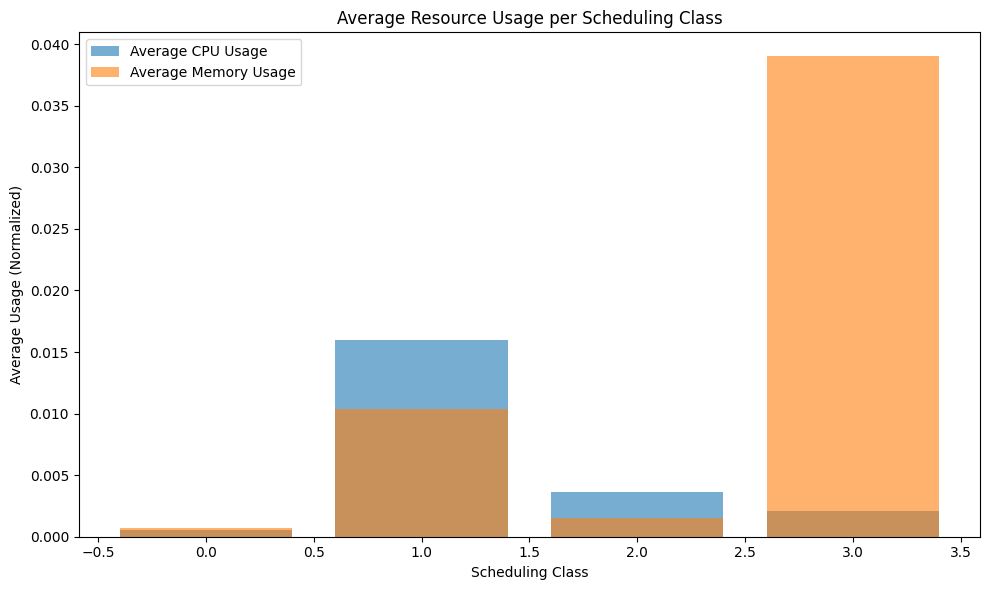

In [ ]:
# Aggregate to calculate average CPU and memory usage per scheduling class
avg_usage_by_scheduling_class = (
    df_joined.groupBy("scheduling_class")
    .agg(
        avg("cpu_rate").alias("avg_cpu_usage"),
        avg("canonical_memory_usage").alias("avg_memory_usage")
    )
    .orderBy("scheduling_class")
)

# Show the results
avg_usage_by_scheduling_class.show()

# Convert to Pandas for easier visualization
avg_usage_pd = avg_usage_by_scheduling_class.toPandas()

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avg_usage_pd["scheduling_class"], avg_usage_pd["avg_cpu_usage"], alpha=0.6, label="Average CPU Usage")
plt.bar(avg_usage_pd["scheduling_class"], avg_usage_pd["avg_memory_usage"], alpha=0.6, label="Average Memory Usage")
plt.title("Average Resource Usage per Scheduling Class")
plt.xlabel("Scheduling Class")
plt.ylabel("Average Usage (Normalized)")
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Scheduling class 3 dominates, indicating that jobs in this scheduling class request and use significantly more memory compared to CPU resources.

**Question 9:**

Use machine learning to predict whether a task will be evicted based on its resource requests and utilization.

## Prepare the Data

Add a label column evicted and select the features for our model.

In [ ]:
print(df_tasks.columns)

['time', 'missing_info', 'job_id', 'task_index', 'machine_id', 'event_type', 'user', 'scheduling_class', 'priority', 'cpu_request', 'memory_request', 'disk_request', 'different_machine_restriction', 'evicted']


In [ ]:
from pyspark.sql.functions import col, when

# Step 1: Join df_tasks with df_task_usage
df_tasks_combined = df_tasks.join(
    df_task_usage,
    (df_tasks["job_id"] == df_task_usage["job_id"]) &
    (df_tasks["task_index"] == df_task_usage["task_index"]),
    "inner"
)

# Step 2: Add 'evicted' label
df_tasks_combined = df_tasks_combined.withColumn(
    "evicted",
    when(col("event_type") == 2, 1).otherwise(0)
)

# Step 3: Select relevant columns for modeling
df_model = df_tasks_combined.select(
    "cpu_request",
    "memory_request",
    "cpu_rate",
    "canonical_memory_usage",
    "disk_io_time",
    "evicted"
)

# Step 4: Verify the data
df_model.show(5)


+-----------+--------------+--------+----------------------+------------+-------+
|cpu_request|memory_request|cpu_rate|canonical_memory_usage|disk_io_time|evicted|
+-----------+--------------+--------+----------------------+------------+-------+
|   6.247E-4|      0.003883|4.578E-5|              9.279E-4|    3.815E-6|      1|
|   6.247E-4|      0.003883|4.482E-5|              9.298E-4|    2.861E-6|      1|
|   6.247E-4|      0.003883|4.482E-5|              9.279E-4|    2.861E-6|      1|
|   6.247E-4|      0.003883|4.482E-5|              9.298E-4|    3.815E-6|      1|
|   6.247E-4|      0.003883|4.578E-5|              9.279E-4|    2.861E-6|      1|
+-----------+--------------+--------+----------------------+------------+-------+
only showing top 5 rows



##Feature Vectorization

Transform the selected features into a single vector column for the machine learning model.

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Define the feature columns
feature_columns = ["cpu_request", "memory_request", "cpu_rate", "canonical_memory_usage", "disk_io_time"]

# Assemble feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Apply the assembler
df_model = assembler.transform(df_model)
df_model.show(5)


+-----------+--------------+--------+----------------------+------------+-------+--------------------+
|cpu_request|memory_request|cpu_rate|canonical_memory_usage|disk_io_time|evicted|            features|
+-----------+--------------+--------+----------------------+------------+-------+--------------------+
|   6.247E-4|      0.003883|4.578E-5|              9.279E-4|    3.815E-6|      1|[6.247E-4,0.00388...|
|   6.247E-4|      0.003883|4.482E-5|              9.298E-4|    2.861E-6|      1|[6.247E-4,0.00388...|
|   6.247E-4|      0.003883|4.482E-5|              9.279E-4|    2.861E-6|      1|[6.247E-4,0.00388...|
|   6.247E-4|      0.003883|4.482E-5|              9.298E-4|    3.815E-6|      1|[6.247E-4,0.00388...|
|   6.247E-4|      0.003883|4.578E-5|              9.279E-4|    2.861E-6|      1|[6.247E-4,0.00388...|
+-----------+--------------+--------+----------------------+------------+-------+--------------------+
only showing top 5 rows



##Split the Data

Split the data into training and testing datasets.

In [ ]:
# Split the data into training (80%) and testing (20%) sets
train_data, test_data = df_model.randomSplit([0.8, 0.2], seed=42)


##Train a Logistic Regression Model

Train a logistic regression model to predict evictions.

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Define the logistic regression model
lr = LogisticRegression(featuresCol="features", labelCol="evicted")

# Train the model
lr_model = lr.fit(train_data)

# Print model coefficients and intercept
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")


Coefficients: [-12.830368619262744,8.337459228652014,39.09434690294523,-0.35517984007121645,-98.6755279791796]
Intercept: -1.0504449815733148


##Make Predictions

Use the trained model to make predictions on the test data.

In [ ]:
# Make predictions on the test dataset
predictions = lr_model.transform(test_data)

# Show predictions
predictions.select("features", "evicted", "prediction", "probability").show(5)


+--------------------+-------+----------+--------------------+
|            features|evicted|prediction|         probability|
+--------------------+-------+----------+--------------------+
|[6.247E-4,0.00388...|      0|       0.0|[0.73596751735144...|
|[6.247E-4,0.00388...|      0|       0.0|[0.73592371300835...|
|[6.247E-4,0.00388...|      0|       0.0|[0.73592371300835...|
|[6.247E-4,0.00388...|      0|       0.0|[0.73594213822350...|
|[6.247E-4,0.00388...|      0|       0.0|[0.73591649522944...|
+--------------------+-------+----------+--------------------+
only showing top 5 rows



##Evaluate the Model

Evaluate the model's performance using metrics like AUC and accuracy.

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate the model using Area Under the ROC Curve (AUC)
evaluator = BinaryClassificationEvaluator(labelCol="evicted", metricName="areaUnderROC")
roc_auc = evaluator.evaluate(predictions)

print(f"ROC-AUC: {roc_auc:.2f}")

# You can also evaluate accuracy, precision, or recall if needed


ROC-AUC: 0.66


##Use Another Classifier

Replace LogisticRegression with RandomForestClassifier:

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol="features", labelCol="evicted", numTrees=20)
rf_model = rf.fit(train_data)

# Make predictions and evaluate
predictions = rf_model.transform(test_data)
roc_auc = evaluator.evaluate(predictions)
print(f"ROC-AUC (Random Forest): {roc_auc:.2f}")


ROC-AUC (Random Forest): 0.69


##Feature Importance in Random Forest

To understand which features are most influential in predicting evictions:

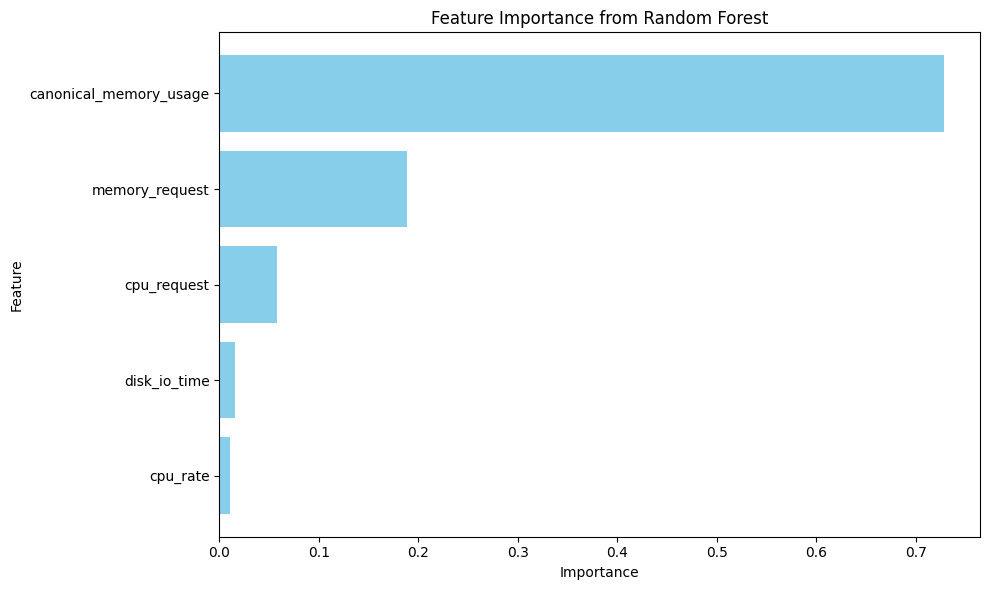

In [ ]:
# Get feature importance
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance from the Random Forest model
rf_feature_importance = rf_model.featureImportances.toArray()

# Map feature importance to feature names
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Extension

In [ ]:
from pyspark.sql.functions import udf
from pyspark.ml.linalg import DenseVector
from pyspark.sql.types import ArrayType, DoubleType

# UDF to convert DenseVector to Array
vector_to_array_udf = udf(lambda vector: vector.toArray().tolist(), ArrayType(DoubleType()))

# Convert the `features` column to an array
df_model = df_model.withColumn("features_array", vector_to_array_udf(col("features")))

# Extract individual features from the array
df_export = df_model.select(
    col("features_array")[0].alias("cpu_request"),
    col("features_array")[1].alias("memory_request"),
    col("features_array")[2].alias("cpu_rate"),
    col("features_array")[3].alias("canonical_memory_usage"),
    col("features_array")[4].alias("disk_io_time"),
    col("evicted")
)

# Save the processed data to a CSV file
df_export.write.csv("eviction_data.csv", header=True)


In [ ]:
import os
import pandas as pd

# Path to the folder containing CSV parts
folder_path = "./eviction_data.csv"

# Combine all parts into a single DataFrame
all_parts = [pd.read_csv(os.path.join(folder_path, f)) for f in os.listdir(folder_path) if f.endswith(".csv")]
data = pd.concat(all_parts, ignore_index=True)

# Proceed with your existing code
X = data.drop(columns=["evicted"])
y = data["evicted"]


In [ ]:
from sklearn.model_selection import train_test_split
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model Training and Evaluation
(a) Scikit-learn
*   Use Logistic Regression and Random Forest Classifier from scikit-learn.
*   Compare AUC, precision, recall, and F1-score with Spark MLlib results.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Logistic Regression AUC:", roc_auc_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest AUC:", roc_auc_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Logistic Regression AUC: 0.5023037755688828
              precision    recall  f1-score   support

           0       0.77      0.99      0.87    135176
           1       0.31      0.01      0.03     40379

    accuracy                           0.77    175555
   macro avg       0.54      0.50      0.45    175555
weighted avg       0.66      0.77      0.67    175555

Random Forest AUC: 0.45444188023513604
              precision    recall  f1-score   support

           0       0.75      0.90      0.82    135176
           1       0.02      0.01      0.01     40379

    accuracy                           0.70    175555
   macro avg       0.38      0.45      0.41    175555
weighted avg       0.58      0.70      0.63    175555



(b) TensorFlow

*   Implement a simple neural network using TensorFlow/Keras.
*   Evaluate its performance and compare it with Spark MLlib.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Neural Network
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["AUC"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate on test set
tf_preds = model.predict(X_test)
print("Neural Network AUC:", roc_auc_score(y_test, tf_preds))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17556/17556 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - AUC: 0.6674 - loss: 0.4899 - val_AUC: 0.6932 - val_loss: 0.4692
Epoch 2/10
17556/17556 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - AUC: 0.6893 - loss: 0.4668 - val_AUC: 0.6919 - val_loss: 0.4649
Epoch 3/10
17556/17556 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - AUC: 0.6912 - loss: 0.4627 - val_AUC: 0.6952 - val_loss: 0.4616
Epoch 4/10
17556/17556 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - AUC: 0.6932 - loss: 0.4590 - val_AUC: 0.6971 - val_loss: 0.4587
Epoch 5/10
17556/17556 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - AUC: 0.6940 - loss: 0.4575 - val_AUC: 0.6988 - val_loss: 0.4576
Epoch 6/10
17556/17556 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - AUC: 0.6941 - loss: 0.4574 - val_AUC: 0.6987 - val_loss: 0.4579
Epoch 7/10
17556/17556 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - AUC: 0.6953 - loss: 0.4561 - val_AUC: 0.6991 - val_loss: 0.4587
Epoch 8/10
17556/17556 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - AUC: 0.6945 - loss: 0.4562 - val_AUC: 0.6989 - val_loss: 0.4553
Epoch 9/10
17556

(c) PyTorch

Train a basic neural network and compare the results with the previous frameworks.

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Define the model
class EvictionNN(nn.Module):
    def __init__(self):
        super(EvictionNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

model = EvictionNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
for epoch in range(10):
    for batch in train_loader:
        X_batch, y_batch = batch
        optimizer.zero_grad()
        preds = model(X_batch).squeeze()
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()

# Evaluate
with torch.no_grad():
    test_preds = model(X_test_tensor).squeeze()
print("PyTorch AUC:", roc_auc_score(y_test_tensor.numpy(), test_preds.numpy()))


PyTorch AUC: 0.7005786922805044
